In [1]:
import matplotlib.pyplot as plt

import json
import time
import requests
import pandas as pd 
import numpy as np

#Api key
API_KEY = "dd533342e8b9a6b0da6279eeeaf43107"

from citipy import citipy
#https://github.com/wingchen/citipy
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities(lngs=y)
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (lats=x)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
print(lats)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
print(lngs)
lat_lngs = zip( lats, lngs)
print(lat_lngs)
# it will show the list of all generated cordinates 
# for l, s in lat_lngs:
#    print(f"{l}-{s}")

[ 18.47828518 -51.54076846  21.7991576  ... -27.61152765 -26.0903207
 -13.07198069]
[  34.51067458  142.61361929  171.66587285 ...  -17.32477056  171.7970509
 -148.17616094]


In [3]:
# Identify nearest city for each lat, lng combination. We are looping over to get the cordinates(tuples) and 
#if it is there then I will pass it to the cities list(if the city is not in that list then I have to append it)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
# Get Weather Data
# We recommend making calls to the API no more than one time every 10 minutes 
# for one location (city / coordinates / zip-code). 
# This is due to the fact that weather data in our system is updated no more than one time every 10 minutes.
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&APPID={API_KEY}&units={units}&q="
# query_url = query_url + city + f"&APPID={API_KEY}"
print(query_url)
print(query_url + city)
weather_response = requests.get(query_url + city)

weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))
print(json.dumps(weather_json, indent=4))

https://api.openweathermap.org/data/2.5/weather?&APPID=dd533342e8b9a6b0da6279eeeaf43107&units=imperial&q=
https://api.openweathermap.org/data/2.5/weather?&APPID=dd533342e8b9a6b0da6279eeeaf43107&units=imperial&q=mahina
{
    "coord": {
        "lon": -10.85,
        "lat": 13.76
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 97.56,
        "pressure": 1007.14,
        "humidity": 32,
        "temp_min": 97.56,
        "temp_max": 97.56,
        "sea_level": 1007.14,
        "grnd_level": 989.38
    },
    "wind": {
        "speed": 7.61,
        "deg": 339.174
    },
    "clouds": {
        "all": 15
    },
    "dt": 1561827770,
    "sys": {
        "message": 0.0065,
        "country": "ML",
        "sunrise": 1561789126,
        "sunset": 1561835674
    },
    "timezone": 0,
    "id": 2460755,
    "name": "Mah

In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | New Norfolk
Processing Record 2 | Butaritari
Processing Record 3 | Hobart
Processing Record 4 | Rocha
Processing Record 5 | Jamestown
Processing Record 6 | Okhotsk
Processing Record 7 | San Roque
Processing Record 8 | Qaqortoq
Processing Record 9 | Bethel
Processing Record 10 | Ushuaia
Processing Record 11 | Trat
Processing Record 12 | Cape Town
Processing Record 13 | Harper
Processing Record 14 | Launceston
Processing Record 15 | Upernavik
Processing Record 16 | Ribeira Grande
Processing Record 17 | Portland
Processing Record 18 | Mairana
Processing Record 19 | Mahebourg
Processing Record 20 | Kavieng
Processing Record 21 | Qufu
Processing Record 22 | Xuddur
Processing Record 23 | Katobu
Processing Record 24 | Hermanus
Processing Record 25 | Punta Arenas
City not found. Skipping...
Processing Record 26 | Henties Bay
City not found. Skipping...
Processing Record 27 | Bluff
Process

Processing Record 229 | Fortuna
Processing Record 230 | Bethanien
Processing Record 231 | Chulman
Processing Record 232 | Anloga
Processing Record 233 | Mount Gambier
City not found. Skipping...
Processing Record 234 | Nevyansk
City not found. Skipping...
Processing Record 235 | Port-Cartier
Processing Record 236 | Kargasok
City not found. Skipping...
City not found. Skipping...
Processing Record 237 | Makakilo City
Processing Record 238 | Kingaroy
Processing Record 239 | Wonthaggi
Processing Record 240 | Turukhansk
Processing Record 241 | Yulara
Processing Record 242 | Codrington
Processing Record 243 | Carnarvon
Processing Record 244 | Chingirlau
Processing Record 245 | Sola
Processing Record 246 | Ocampo
Processing Record 247 | Pastavy
Processing Record 248 | Evensk
Processing Record 249 | Kavaratti
Processing Record 250 | Zhigansk
Processing Record 251 | Iquique
Processing Record 252 | Hegang
Processing Record 253 | Muroto
Processing Record 254 | Torbay
Processing Record 255 | Lude

Processing Record 453 | Boynton Beach
Processing Record 454 | Shorapur
Processing Record 455 | Kohat
Processing Record 456 | Sakaiminato
Processing Record 457 | Trinidad
City not found. Skipping...
Processing Record 458 | Tromso
Processing Record 459 | Luanda
Processing Record 460 | Sao Jose da Coroa Grande
Processing Record 461 | San Cristobal
City not found. Skipping...
Processing Record 462 | Ponnani
Processing Record 463 | Wuwei
Processing Record 464 | Almaty
Processing Record 465 | Nauen
Processing Record 466 | Piacabucu
Processing Record 467 | Prestice
Processing Record 468 | Kahului
Processing Record 469 | Saint-Leu
Processing Record 470 | Simao
Processing Record 471 | Preston
Processing Record 472 | Areosa
Processing Record 473 | Svetlogorsk
Processing Record 474 | Santa Maria
Processing Record 475 | Karlskrona
Processing Record 476 | Nome
Processing Record 477 | Eskil
Processing Record 478 | Kibakwe
Processing Record 479 | Manzhouli
Processing Record 480 | Sao Felix do Xingu
P

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}



In [8]:
weather_dict

{'City': ['New Norfolk',
  'Butaritari',
  'Hobart',
  'Rocha',
  'Jamestown',
  'Okhotsk',
  'San Roque',
  'Qaqortoq',
  'Bethel',
  'Ushuaia',
  'Trat',
  'Cape Town',
  'Harper',
  'Launceston',
  'Upernavik',
  'Ribeira Grande',
  'Portland',
  'Mairana',
  'Mahebourg',
  'Kavieng',
  'Qufu',
  'Xuddur',
  'Katobu',
  'Hermanus',
  'Punta Arenas',
  'Henties Bay',
  'Bluff',
  'Ahipara',
  'Souillac',
  'Khatanga',
  'Aviles',
  'Victoria',
  'Camacupa',
  'Tasiilaq',
  'Avarua',
  'Castro',
  'Hilo',
  'Westport',
  'Grahamstown',
  'Meulaboh',
  'Albany',
  'Chuy',
  'Sorong',
  'Saint-Denis',
  'Qaanaaq',
  'Lishui',
  'Esperance',
  'Bamnet Narong',
  'Port Elizabeth',
  'Rikitea',
  'Komsomolskiy',
  'Alta Floresta',
  'Baykit',
  'Vaini',
  'Vao',
  'Kapaa',
  'Puerto Ayora',
  'Bell Ville',
  'Mataura',
  'Bathsheba',
  'Narsaq',
  'Hami',
  'Chokurdakh',
  'Pyatnitskoye',
  'El Alto',
  'Rio Bueno',
  'Bingol',
  'Te Anau',
  'Nanortalik',
  'Moree',
  'Port Lincoln',
  'W

In [10]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,1561827771,-42.78,147.06,55.99,62,75,17.22
1,Butaritari,KI,1561827563,3.07,172.79,83.18,67,90,1.16
2,Hobart,AU,1561827548,-42.88,147.33,57.00,62,75,17.22
3,Rocha,UY,1561827603,-34.48,-54.34,63.50,92,94,2.46
4,Jamestown,AU,1561827773,-33.21,138.60,41.62,93,0,4.59


In [13]:
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv("weather_data.csv")

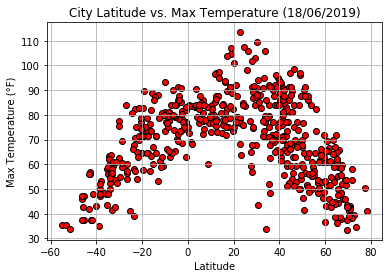

In [16]:


# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (18/06/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#in weatherapp make the folders (img and info_csv)

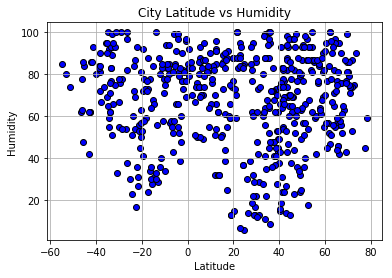

In [19]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#in weatherapp make the folders (img and info_csv)

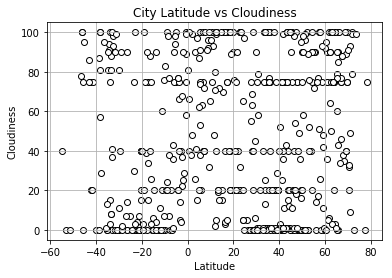

In [22]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="white", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#in weatherapp make the folders (img and info_csv)

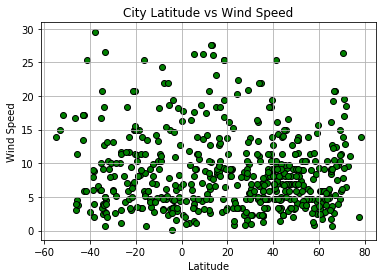

In [24]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind Speed.png")

# Show Plot
plt.show()

#in weatherapp make the folders (img and info_csv)